In [2]:
#import section
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [3]:
#loading datasets
dungeons_dataset = np.load("Data/dungeons_dataset.npy")
rooms_dataset = np.load("Data/rooms_dataset.npy")

print("Shape of dungeons: ", dungeons_dataset.shape)
print("Shape of rooms: ", rooms_dataset.shape)

Shape of dungeons:  (253, 8, 8)
Shape of rooms:  (1157, 16, 16)


In [4]:
#correcting values of datasets
for i in range(0,dungeons_dataset.shape[0]):
  for j in range(0,dungeons_dataset.shape[1]):
    for k in range(0,dungeons_dataset.shape[2]):
      if dungeons_dataset[i][j][k] == 11:
        dungeons_dataset[i][j][k] = 1

In [5]:
#normalizing and reshaping datasets
X_dungeons = (dungeons_dataset.astype(np.float32) - 0.5) / 0.5
X_dungeons = X_dungeons.reshape(253, 64)
X_rooms = (rooms_dataset.astype(np.float32) - 4.0) / 4.0
X_rooms = X_rooms.reshape(1157, 256)

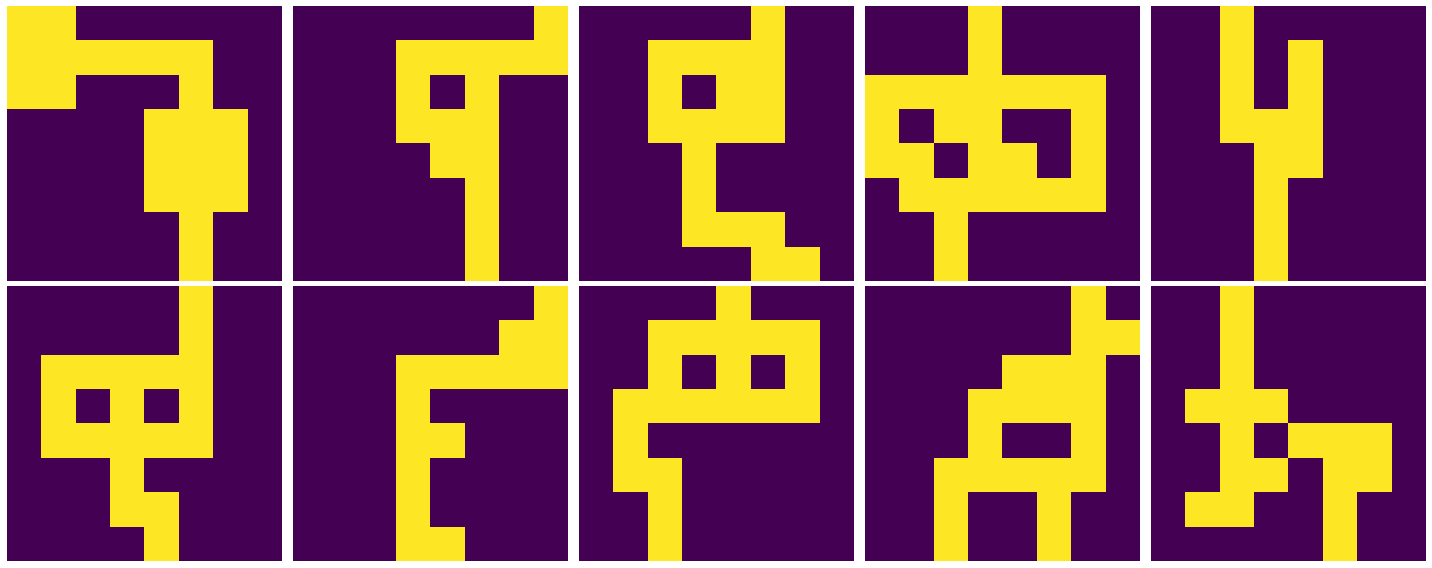

In [6]:
#visualising 10 random dungeons
dungeons_index = np.random.randint(X_dungeons.shape[0], size=10)
plt.figure(figsize=(20,8))
for i in range(len(dungeons_index)):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_dungeons[dungeons_index[i]].reshape(8,8), interpolation='nearest')
  plt.axis('off')
plt.tight_layout()

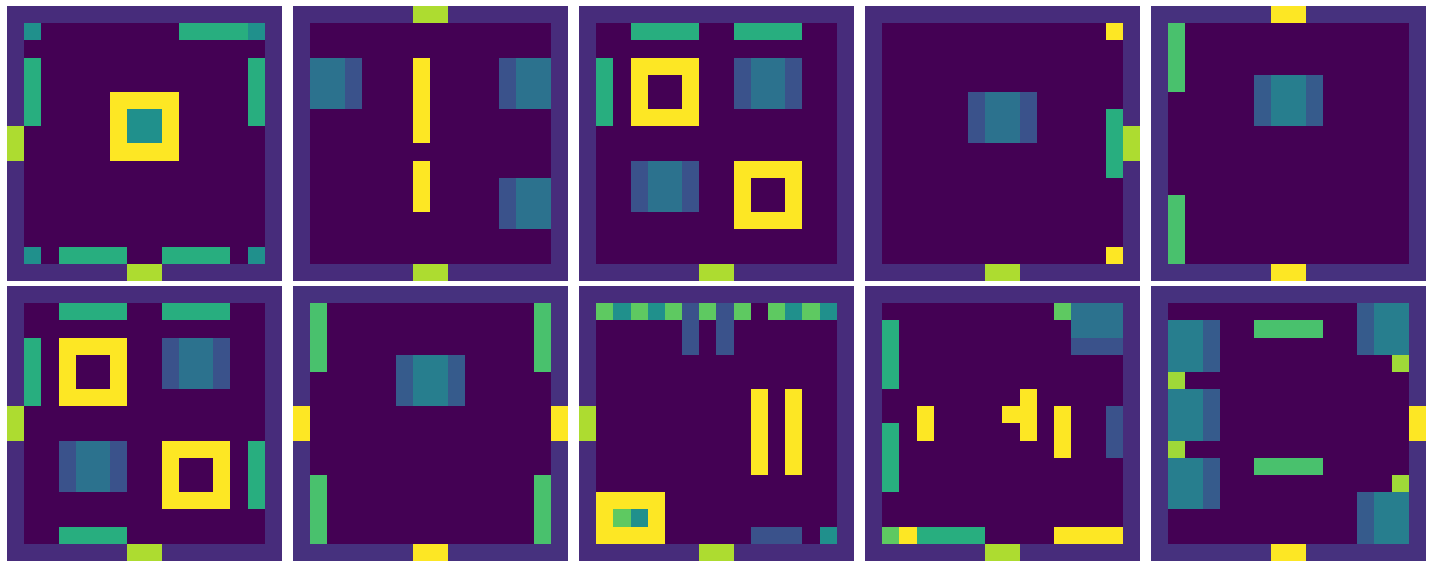

In [8]:
#visualising 10 random rooms
rooms_index = np.random.randint(X_rooms.shape[0], size=10)
plt.figure(figsize=(20,8))
for i in range(len(rooms_index)):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_rooms[rooms_index[i]].reshape(16,16), interpolation='nearest')
  plt.axis('off')
plt.tight_layout()

In [8]:
#create an augmentation that rotate the data in -90, 90, or 180 degrees and flip the data horizontally or vertically
def rotation(image):
  return np.rot90(image, np.random.choice([-1, 0, 1, 2]))

augmentation = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, preprocessing_function=rotation)

In [9]:
#add augmented dungeons to dataset
augmented_dungeons = augmentation.flow(X_dungeons.reshape(253, 8, 8, 1))

for (i, newDungeons) in enumerate(augmented_dungeons):
  X_dungeons = np.append(X_dungeons, newDungeons.reshape(newDungeons.shape[0],64), axis=0)
  if i == 30:
    break

print("Shape of new dungeons: ", X_dungeons.shape)

Shape of new dungeons:  (1236, 64)


In [10]:
#add augmented rooms to dataset
augmented_rooms = augmentation.flow(X_rooms.reshape(1157, 16, 16, 1))

for (i, newRooms) in enumerate(augmented_rooms):
  X_rooms = np.append(X_rooms, newRooms.reshape(newRooms.shape[0],256), axis=0)
  if i == 60:
    break

print("Shape of new rooms: ", X_rooms.shape)

Shape of new rooms:  (3082, 256)


In [11]:
#spliting datasets into train and test sets
X_dungeons_train, X_dungeons_test = train_test_split(X_dungeons, test_size=0.10)
X_rooms_train, X_rooms_test = train_test_split(X_rooms, test_size=0.20)

In [12]:
#saving new data
np.save("Processed_Data/dungeons_train.npy", X_dungeons_train)
np.save("Processed_Data/dungeons_test.npy", X_dungeons_test)
np.save("Processed_Data/rooms_train.npy", X_rooms_train)
np.save("Processed_Data/rooms_test.npy", X_rooms_test)